In [1]:
import os, sys, glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
TARGET_ASP_RATIO = 16.0/9
haar_face_cascade = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')
# haar_face_cascade = cv2.CascadeClassifier('./haarcascade_glasses.xml')
haar_eye_cascade = cv2.CascadeClassifier('./haarcascade_eye.xml')

In [3]:
def crop_to_first_face(image_copy, faces_rect, debug=False):
    # Logic to detect cropping area
    y_crop = 0;
    crop_height = int(image_copy.shape[1]*1.0/TARGET_ASP_RATIO)
    if debug:
        print("crop_height: " + str(crop_height))
    # Pick the first face from top and create boundary
    if (len(faces_rect) > 0):
        sorted_faces_rect = sorted(faces_rect , key = lambda x: float(x[1]))
        
        x, y, w, h = sorted_faces_rect[0]
        if debug:
            print("Face Dims: ")
            print(x,y,w,h)
        # Start crop from double the face height
        yc = int(y - int(0.5*h))
        if yc < 0:
            yc = 0;
        y_crop = yc
        if debug:
            print("Crop y positions: ")
            print(y_crop, y_crop+crop_height)
        # Create a border to highlight image cropping
        cv2.rectangle(image_copy, (0, y_crop), 
                      (image_copy.shape[1], y_crop+crop_height), 
                      (0, 0, 250), 30)
        # Crop the image
        crop_img = image_copy[y_crop:y_crop+crop_height, 0:image_copy.shape[1]]
        if debug:
            print("crop_img: ")
            print(crop_img.shape)
    else:
        # no faces found, rotate the image
        crop_img = cv2.rotate(image_copy, cv2.ROTATE_90_CLOCKWISE)
        cv2.rectangle(crop_img, (0,0), (crop_img.shape[1], crop_img.shape[0]),
                      (0, 250, 0), 30)
        

    return crop_img

In [12]:
def detect_faces(cascade, test_image, debug=False):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()

    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=1.1, 
                                          minNeighbors=10, minSize=(100,100))

    if debug:
        print("faces_rect: " + str(len(faces_rect)))

    for (x, y, w, h) in faces_rect:
        cv2.rectangle(image_copy, (x, y), (x+w, y+h), (255, 0, 0), 2)    
    
    crop_img = crop_to_first_face(image_copy, faces_rect, debug)
    
#     crop_to_most_faces(image_copy, faces_rect)
    
    return crop_img

def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

faces_rect: 1
crop_height: 884
Face Dims: 
810 1316 263 263
Crop y positions: 
1185 2069
crop_img: 
(884, 1572, 3)


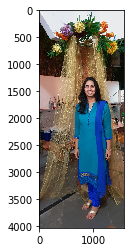

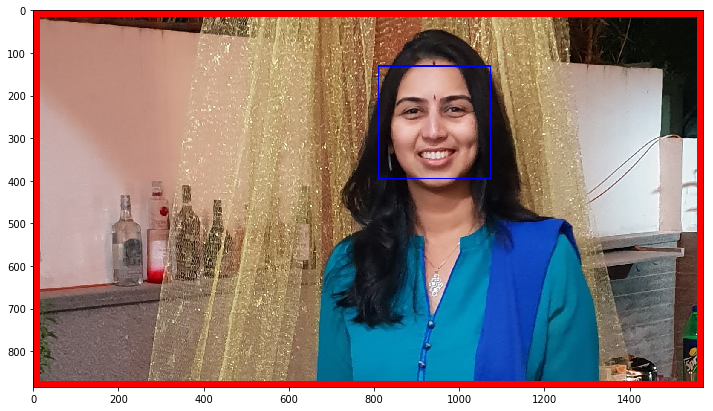

In [16]:
# loading image
# test_image = cv2.imread('/Users/amitsharma/Downloads/RajasthanTrip-Dec2019/20191230_160138.jpg')
# test_image = cv2.imread('/Users/amitsharma/axs/hobby/raspi/check/20200407_172059.jpg')
test_image = cv2.imread('/Users/amitsharma/axs/hobby/raspi/slideshow/output/portrait/20181231_214224.jpg')


# test_image = cv2.imread('/Users/amitsharma/Downloads/IMG-20160214-WA002.jpg')


#call the function to detect faces
faces = detect_faces(haar_face_cascade, test_image, debug=True)

fig=plt.figure()
# fig.add_subplot(1,1,1)
plt.imshow(convertToRGB(test_image))

#convert to RGB and display image
# plt.figure(figsize = (10,10))
# fig.add_subplot(1,2,2)
fig=plt.figure(figsize=(12,12))
plt.imshow(convertToRGB(faces))

In [17]:
PORTRAIT_DIR = "/Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/"

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20200314_172625.jpg


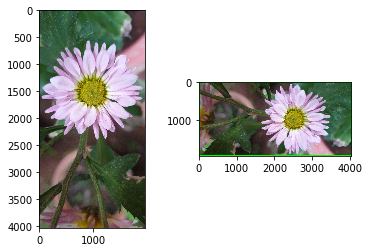

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20181107_201130.jpg


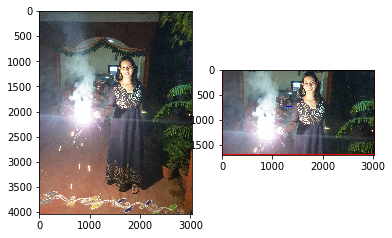

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20190811_153235.jpg


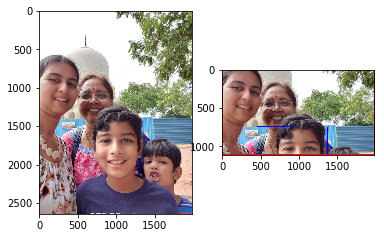

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20191006_104449.jpg


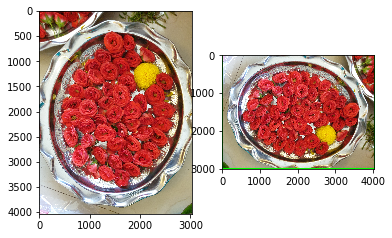

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20200126_092939.jpg


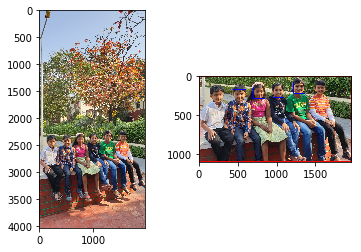

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20191107_142002.jpg


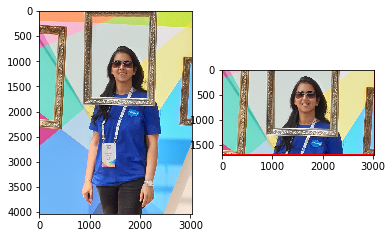

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20200126_092816.jpg


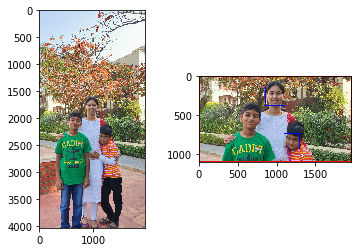

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20190920_141931.jpg


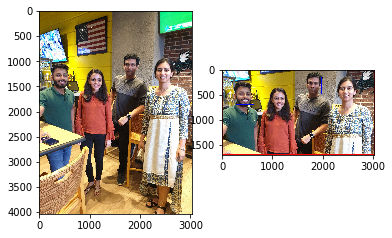

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20191230_210523.jpg


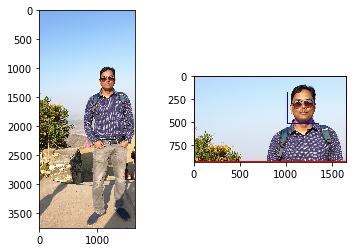

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20191008_130344.jpg


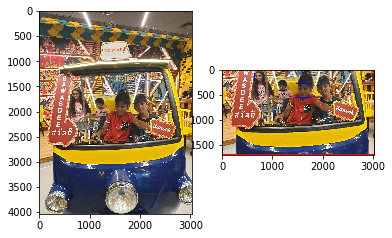

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20191230_113849.jpg


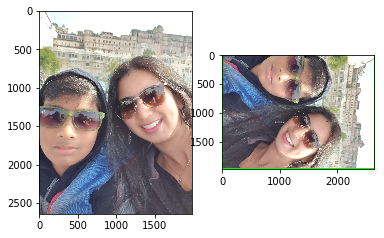

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20191006_110120.jpg


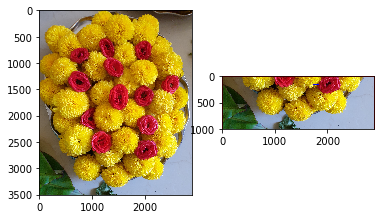

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20191230_132527.jpg


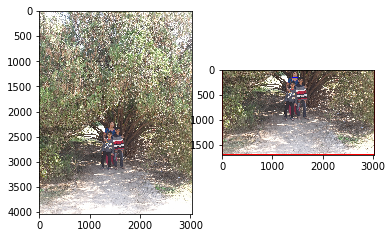

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20200101_112446.jpg


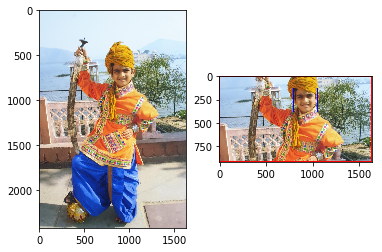

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20200314_172513.jpg


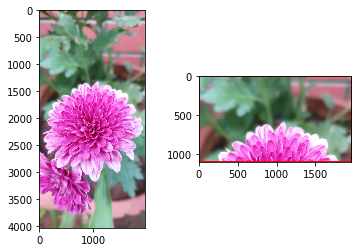

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20191006_193200.jpg


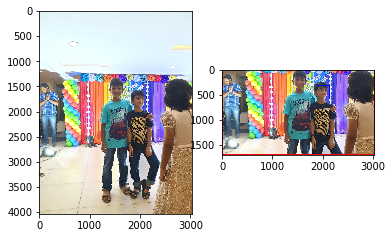

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20190815_131925.jpg


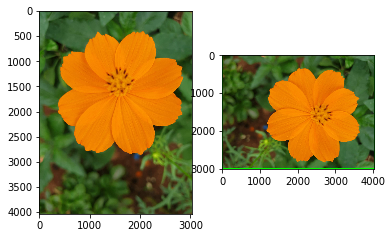

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20190811_151103.jpg


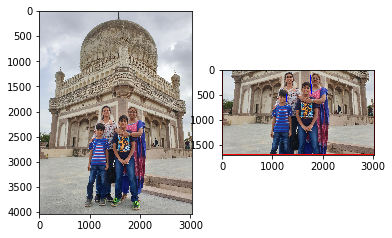

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20191027_222822.jpg


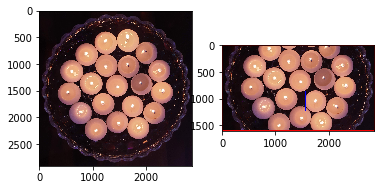

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20191027_204316.jpg


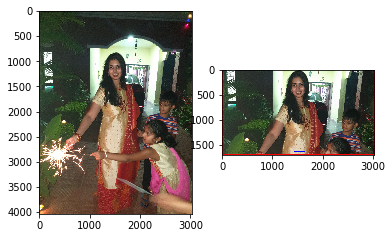

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20181107_233229.jpg


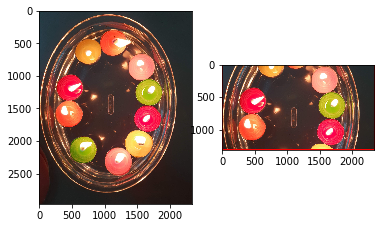

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20190811_154155.jpg


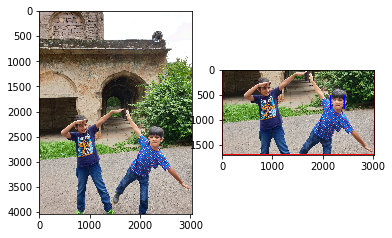

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20190811_145728.jpg


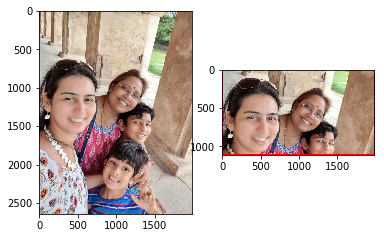

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20191230_132433.jpg


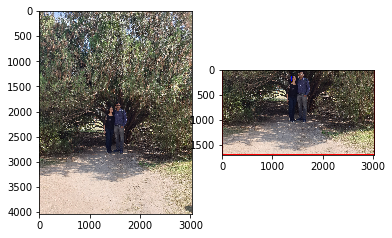

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20191230_113832.jpg


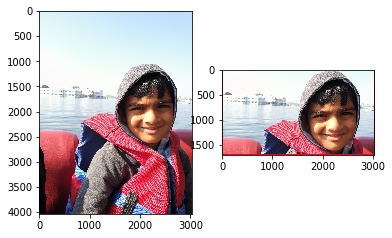

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20200101_112542.jpg


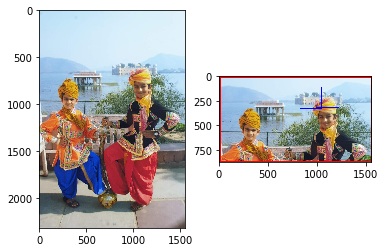

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20191230_113956.jpg


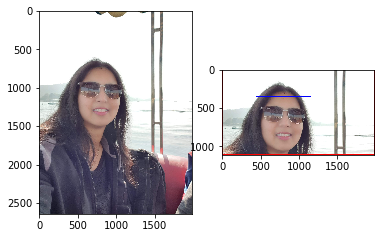

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20181231_214224.jpg


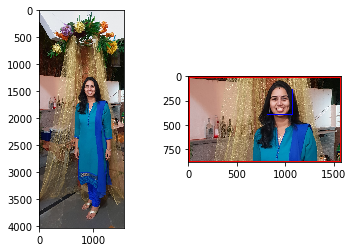

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20181107_191635.jpg


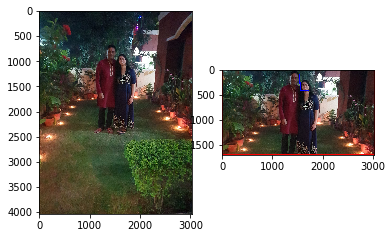

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20191230_132019.jpg


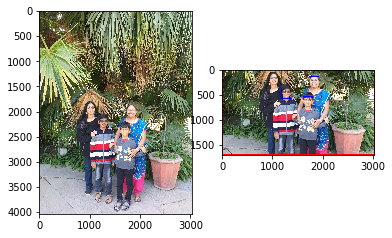

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20191230_132030.jpg


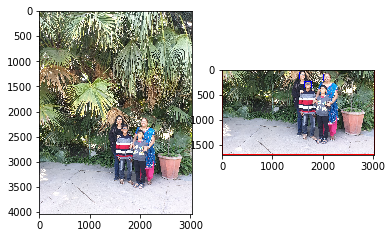

Processing: /Users/amitsharma/axs/hobby/raspi/slideshow/output/Portrait/20190811_145713.jpg


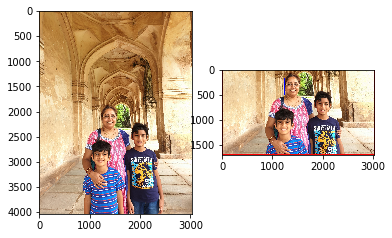

In [18]:
os.chdir(PORTRAIT_DIR)
for file in glob.glob("*.jpg"):
    print("Processing: " + PORTRAIT_DIR + file)
    
    # loading image
    test_image = cv2.imread(PORTRAIT_DIR + file)
    fig=plt.figure(1)
    # Original image in left side
    fig.add_subplot(1,2,1)
    plt.imshow(convertToRGB(test_image))

    # crop the image
    crop_img = detect_faces(haar_face_cascade, test_image)
    
    # Cropped image on right side
    fig.add_subplot(1,2,2)
    plt.imshow(convertToRGB(crop_img))
    
    plt.show()